<a href="https://colab.research.google.com/github/david-adewoyin/machine_learning_basics/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering
### Python Implementation of K-means Clustering from scratch

**Kmeans** is a clustering based algorithm where we try to assign *n-observations* to a set of cluster. The idea is to find group independent observations together to form clusters which shows their similarity in some ways. **Kmeans algorithm** works by creating a finite set of cluster centers also known as **centriod** and assigning observations to the nearest cluster center.


## Implementing K-means

<img alt='kmeans_convergence.gif' src='https://github.com/david-adewoyin/machine_learning_basics/blob/main/images/kmeans_convergence.gif?raw=1' height='100px' width='300px'>  


The kmeans algorithm is an iterative based algortihm where given a set of observations $\{x^{(1)},...,x^{(m)}\}$
where assign the observations to the closest cluster center.   
Intuitively:  
   - We start by guessing the initial cluster centers (1,..,k)
   - Then we assign the observations or data points to the nearest cluster centers using the least squared Euclidean distance.
   - Then we try to choose new cluster centers that minimizing the distances between every points in the clusters.
   - We repeat the process again until the algorithm converge.

Note:  
    The K-means algorithm will always converge to some final set of centriods , however the converged solution may not be the optimal one and you may need to run the algorithm a few times with different random initializations and choose the one with the lowest cost function value.
    

In [ ]:
## Importing required modules
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

np.random.seed(126)

In [ ]:
## Creating our dataset
X,y = make_blobs(n_samples=500,centers=3,n_features=3,random_state=0)

In [ ]:
# X has 3 features and 500 examples
print(f" the shape of X is {X.shape}")

 the shape of X is (500, 3)


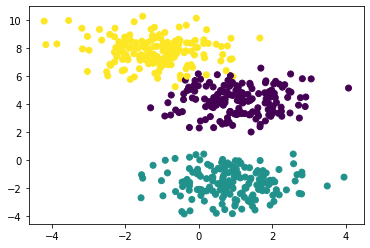

In [ ]:
# Visualizing X
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
class Kmeans:
    def __init__(self,n_clusters=3,n_iter=100):
        self.n_clusters = n_clusters
        self.n_iter = n_iter
        
    def fit(self,X):
        m,n = X.shape
        self.centriods = np.random.rand(self.n_clusters,n)
        
        for iter in range(self.n_iter):
            idx= self._find_nearest_centriod(X)
            self.centriods = self._compute_centriods(X,idx)
               
    def predict(self,X):
        return self._find_nearest_centriod(X)
        
    def _compute_centriods(self,X,idx):
        m, n = X.shape
        centriods = np.zeros((self.n_clusters,n))
    
        for k in range(self.n_clusters):
            points = X[idx==k] 
            centriods[k]= np.mean(points,axis=0)
    
        return centriods

    def _find_nearest_centriod(self,X):
        K = self.centriods.shape[0]
        idx= np.zeros(X.shape[0],dtype=int)
        
        # loop through every examples
        for i in range(X.shape[0]):
            distance= []
            for j in range(self.centriods.shape[0]):
                norm = np.linalg.norm(X[i]- self.centriods[j])
                distance.append(norm)
                idx[i]=np.argmin(distance)
        return idx
        

## Running Kmeans

In [ ]:
kmeans = Kmeans(n_clusters=3)
kmeans.fit(X)

In [ ]:
predictions = kmeans.predict(X)

## Visualizing The  Kmeans output

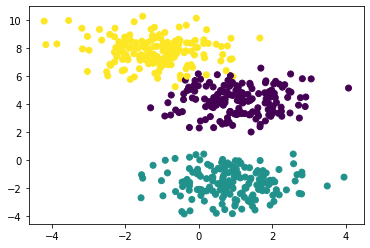

In [ ]:
# Visualizing 
plt.scatter(X[:,0],X[:,1],c=predictions)

  <p  class='alert alert-info alert-box'>Note:<br>Kmeans is an unsupervised learning algorithm and the number of optimal clusters may not be known though there are some techniques not covered in this notebook for choosing the optimal number of clusters, also there exists techniques for choosing the initial cluster centers </p> 
 